In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Dict, Any
import logging
from molencoder.evaluation.statistical_evaluation import repeated_measures_anova, tukey_hsd
from molencoder.utils.experiment_plotting import analyze_and_plot_five_experiments, analyze_and_plot_experiments

Significant differences found for mae with p-value 2.8417693653722908e-98
Saved PNG plot for mae to /Users/fabian/Code/smilesencoder/plots/hparam_insensivity/pretrain/mae_comparison.png
Saved PDF plot for mae to /Users/fabian/Code/smilesencoder/plots/hparam_insensivity/pretrain/mae_comparison.pdf


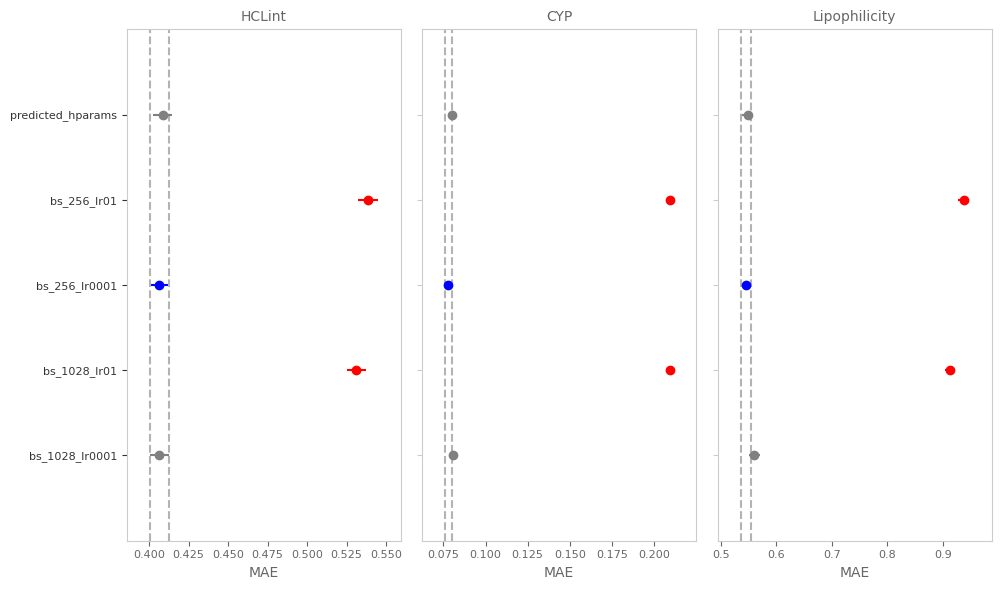

Significant differences found for mse with p-value 8.112998712833009e-95
Saved PNG plot for mse to /Users/fabian/Code/smilesencoder/plots/hparam_insensivity/pretrain/mse_comparison.png
Saved PDF plot for mse to /Users/fabian/Code/smilesencoder/plots/hparam_insensivity/pretrain/mse_comparison.pdf


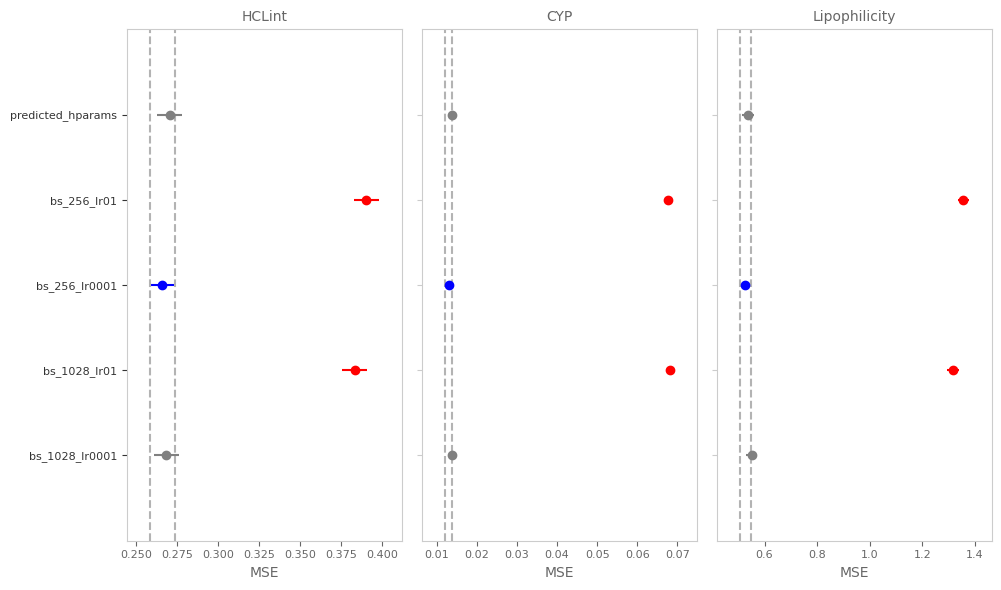

Significant differences found for r2 with p-value 5.404354067247925e-103
Saved PNG plot for r2 to /Users/fabian/Code/smilesencoder/plots/hparam_insensivity/pretrain/r2_comparison.png
Saved PDF plot for r2 to /Users/fabian/Code/smilesencoder/plots/hparam_insensivity/pretrain/r2_comparison.pdf


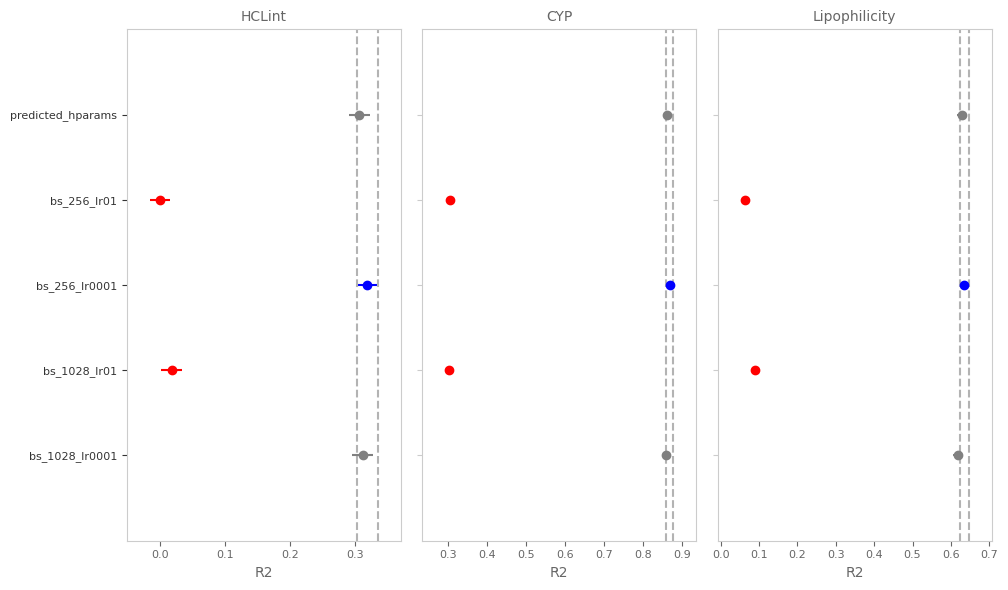

Significant differences found for rho with p-value 7.447342828463388e-93
Saved PNG plot for rho to /Users/fabian/Code/smilesencoder/plots/hparam_insensivity/pretrain/rho_comparison.png
Saved PDF plot for rho to /Users/fabian/Code/smilesencoder/plots/hparam_insensivity/pretrain/rho_comparison.pdf


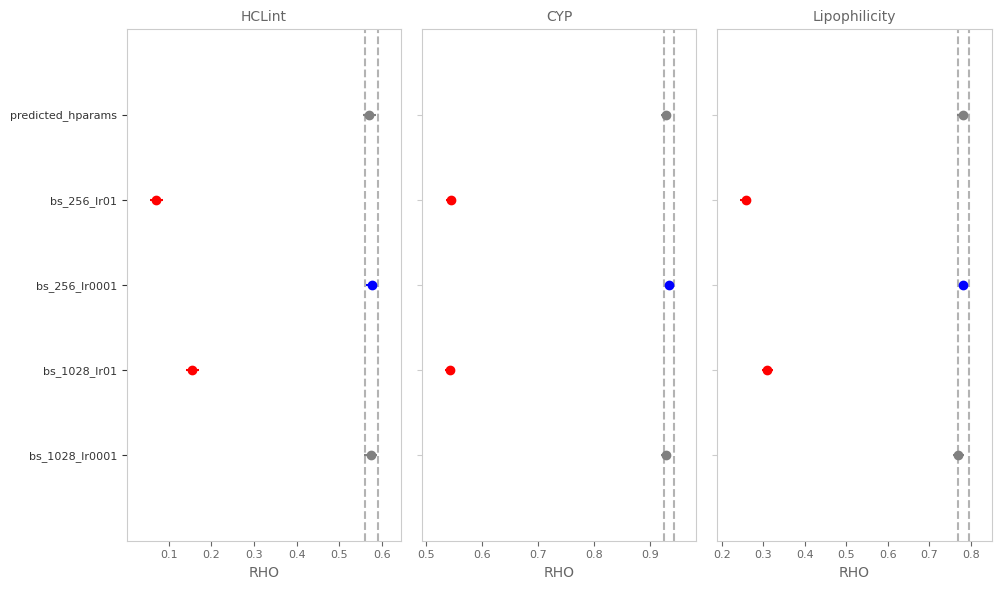

In [2]:
csv_paths = [
    "/Users/fabian/Code/smilesencoder/experiments/hparam_insensitivity_experiment/adme-fang-HCLint-1_results.csv",
    "/Users/fabian/Code/smilesencoder/experiments/hparam_insensitivity_experiment/adme-novartis-cyp3a4-reg_results.csv",
    "/Users/fabian/Code/smilesencoder/experiments/hparam_insensitivity_experiment/lipophilicity-astrazeneca_results.csv",
]

model_name_mapping = {
    "fabikru/model_5M_medium_ds_masking_30_bs_1028_lr0001": "bs_1028_lr0001",
    "fabikru/model_5M_medium_ds_masking_30_bs_1028_lr01": "bs_1028_lr01", 
    "fabikru/model_5M_medium_ds_masking_30_bs_256_lr0001": "bs_256_lr0001",
    "fabikru/model_5M_medium_ds_masking_30_bs_256_lr01": "bs_256_lr01",
    "fabikru/model_5M_medium_ds_masking_30_predicted_hparams": "predicted_hparams"
}

output_dir = "/Users/fabian/Code/smilesencoder/plots/hparam_insensivity/pretrain"
analyze_and_plot_experiments(csv_paths, model_name_mapping, output_dir, y_axis_label="")

In [3]:
def load_and_prepare_data(csv_path: str) -> Dict[str, pd.DataFrame]:
    """
    Load the CSV file and prepare data for each metric.
    
    Args:
        csv_path: Path to the CSV file containing evaluation results
        
    Returns:
        Dictionary with metric names as keys and prepared DataFrames as values
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)
    
    # Create a dictionary to store prepared data for each metric
    prepared_data = {}
    
    # Get unique metrics
    metrics = df['metric_name'].unique()
    
    for metric in metrics:
        # Filter data for current metric
        metric_data = df[df['metric_name'] == metric]
        
        # Pivot the data to have models as columns and folds as rows
        pivot_data = metric_data.pivot(
            index='fold',
            columns='model',
            values='value'
        )
        
        prepared_data[metric] = pivot_data
    
    return prepared_data


In [4]:
def find_best_model(data: pd.DataFrame, metric_name: str) -> str:
    """
    Find the best performing model based on the metric values.
    For MAE and MSE, lower is better. For R2 and rho, higher is better.
    
    Args:
        data: DataFrame with models as columns and metric values as rows
        metric_name: Name of the metric being evaluated
        
    Returns:
        Name of the best performing model
    """
    # Calculate mean performance for each model
    model_means = data.mean()
    
    if metric_name in ['mae', 'mse']:
        # For MAE and MSE, lower is better
        best_model = model_means.idxmin()
    else:
        # For R2 and rho, higher is better
        best_model = model_means.idxmax()
    
    return best_model

In [5]:
csv_path = "/home/ubuntu/smiles_encoder/experiments/hparam_insensitivity_experiment/adme-fang-HCLint-1_results.csv"
# Load and prepare the data
prepared_data = load_and_prepare_data(csv_path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/smiles_encoder/experiments/hparam_insensitivity_experiment/adme-fang-HCLint-1_results.csv'

In [5]:
prepared_data["mae"].head()

model,fabikru/model_5M_medium_ds_masking_30_bs_1028_lr0001,fabikru/model_5M_medium_ds_masking_30_bs_1028_lr01,fabikru/model_5M_medium_ds_masking_30_bs_256_lr0001,fabikru/model_5M_medium_ds_masking_30_bs_256_lr01,fabikru/model_5M_medium_ds_masking_30_predicted_hparams
fold,,,,,
0,0.408621,0.529763,0.424026,0.542547,0.415262
1,0.421817,0.515246,0.417121,0.524243,0.401257
2,0.395583,0.546357,0.386057,0.551691,0.423437
3,0.445873,0.543019,0.414339,0.542971,0.410811
4,0.427146,0.523913,0.373776,0.525823,0.392051


Significant differences found for mae (p = 0.0000)
Best performing model for mae: fabikru/model_5M_medium_ds_masking_30_bs_256_lr0001


<Figure size 1000x600 with 0 Axes>

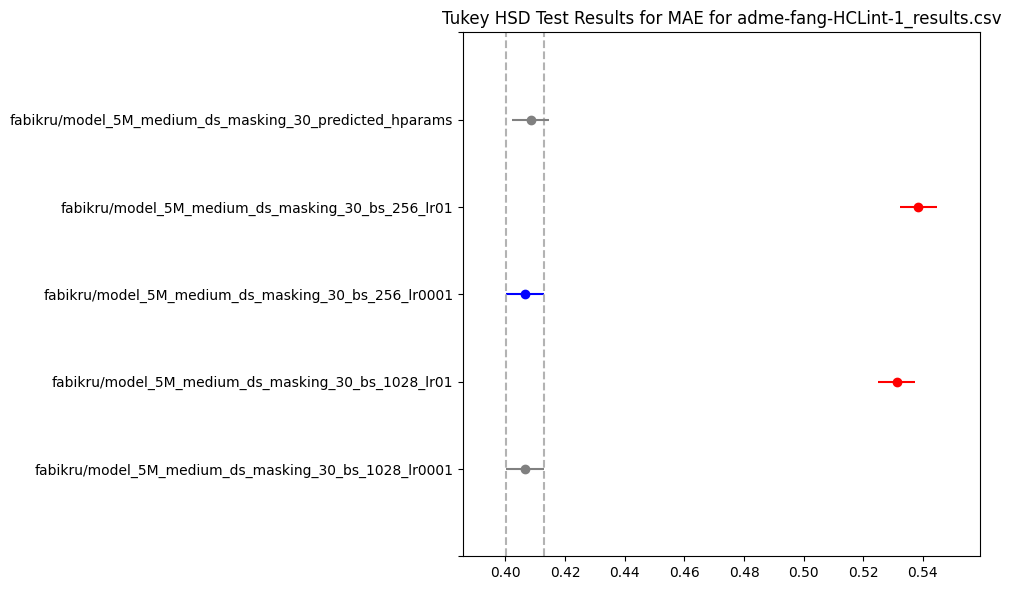

Significant differences found for mse (p = 0.0000)
Best performing model for mse: fabikru/model_5M_medium_ds_masking_30_bs_256_lr0001


<Figure size 1000x600 with 0 Axes>

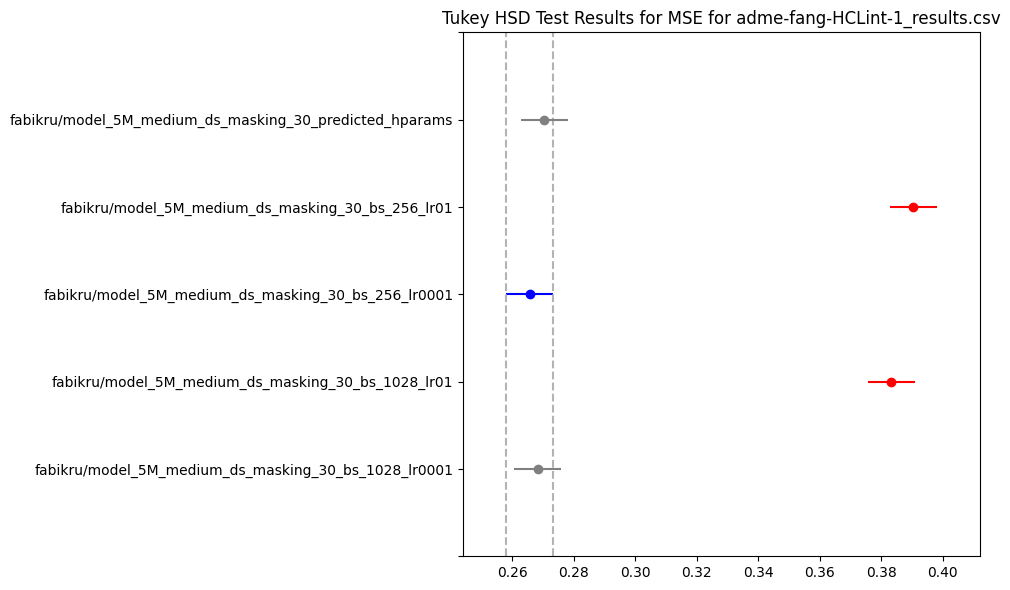

Significant differences found for r2 (p = 0.0000)
Best performing model for r2: fabikru/model_5M_medium_ds_masking_30_bs_256_lr0001


<Figure size 1000x600 with 0 Axes>

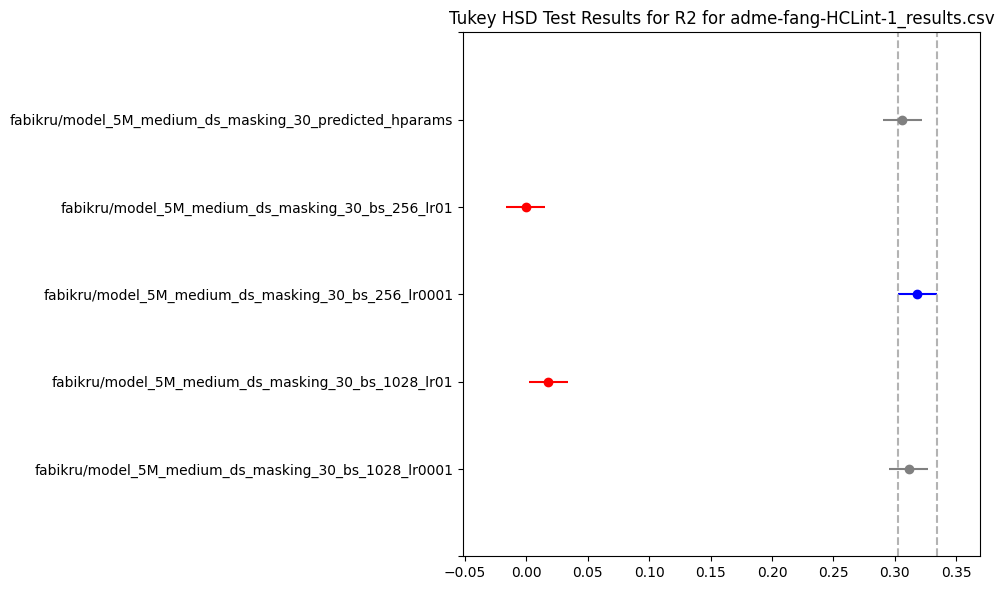

Significant differences found for rho (p = 0.0000)
Best performing model for rho: fabikru/model_5M_medium_ds_masking_30_bs_256_lr0001


<Figure size 1000x600 with 0 Axes>

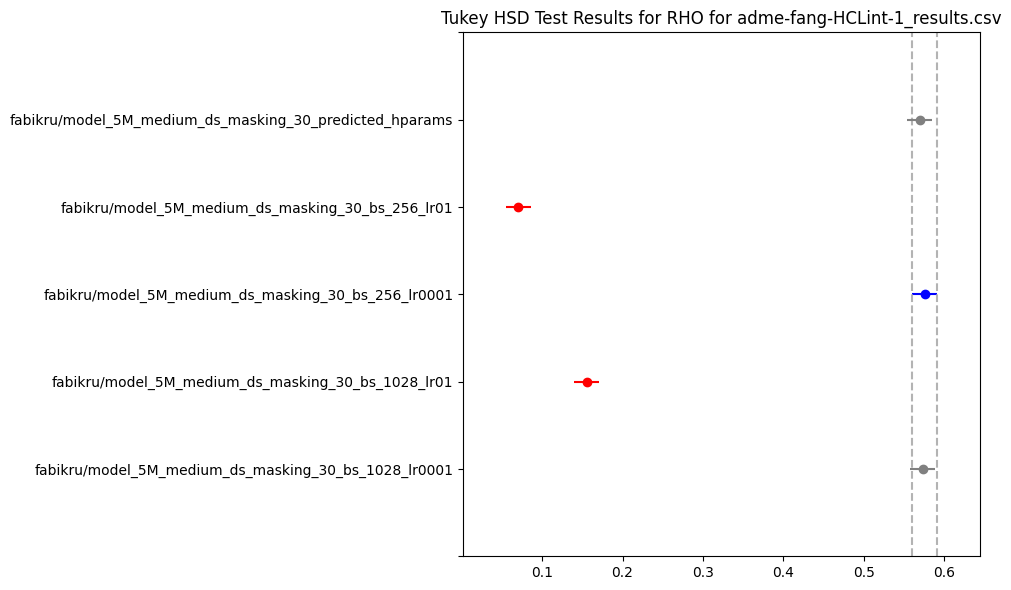

Significant differences found for mae (p = 0.0000)
Best performing model for mae: fabikru/model_5M_medium_ds_masking_30_bs_256_lr0001


<Figure size 1000x600 with 0 Axes>

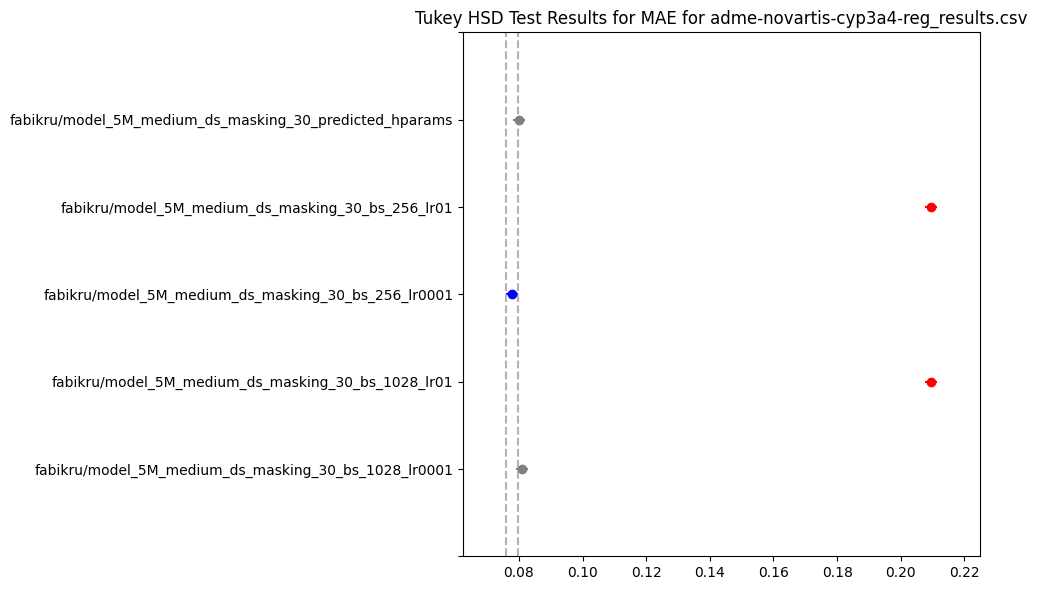

Significant differences found for mse (p = 0.0000)
Best performing model for mse: fabikru/model_5M_medium_ds_masking_30_bs_256_lr0001


<Figure size 1000x600 with 0 Axes>

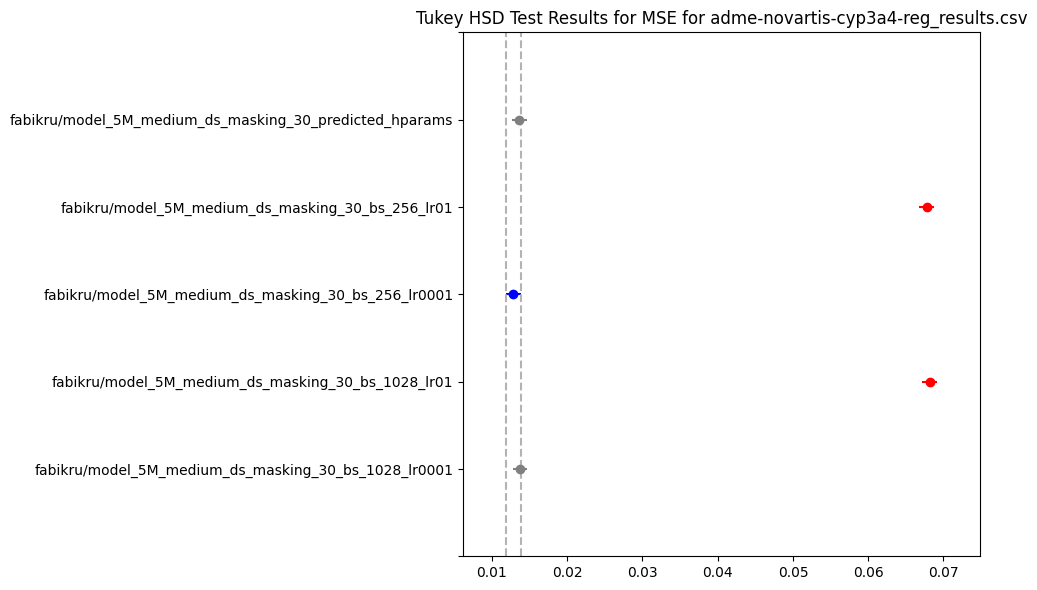

Significant differences found for r2 (p = 0.0000)
Best performing model for r2: fabikru/model_5M_medium_ds_masking_30_bs_256_lr0001


<Figure size 1000x600 with 0 Axes>

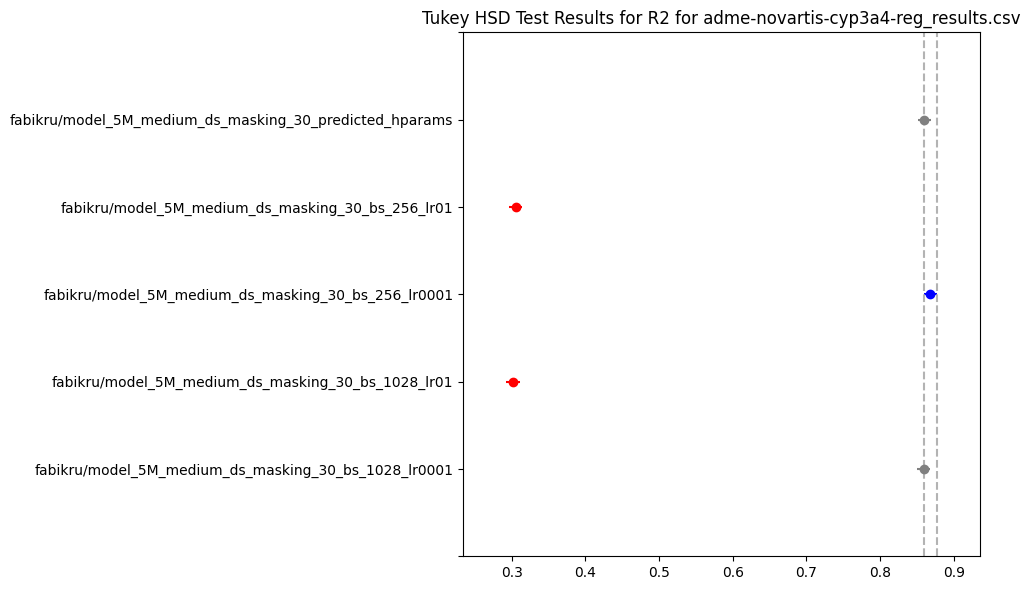

Significant differences found for rho (p = 0.0000)
Best performing model for rho: fabikru/model_5M_medium_ds_masking_30_bs_256_lr0001


<Figure size 1000x600 with 0 Axes>

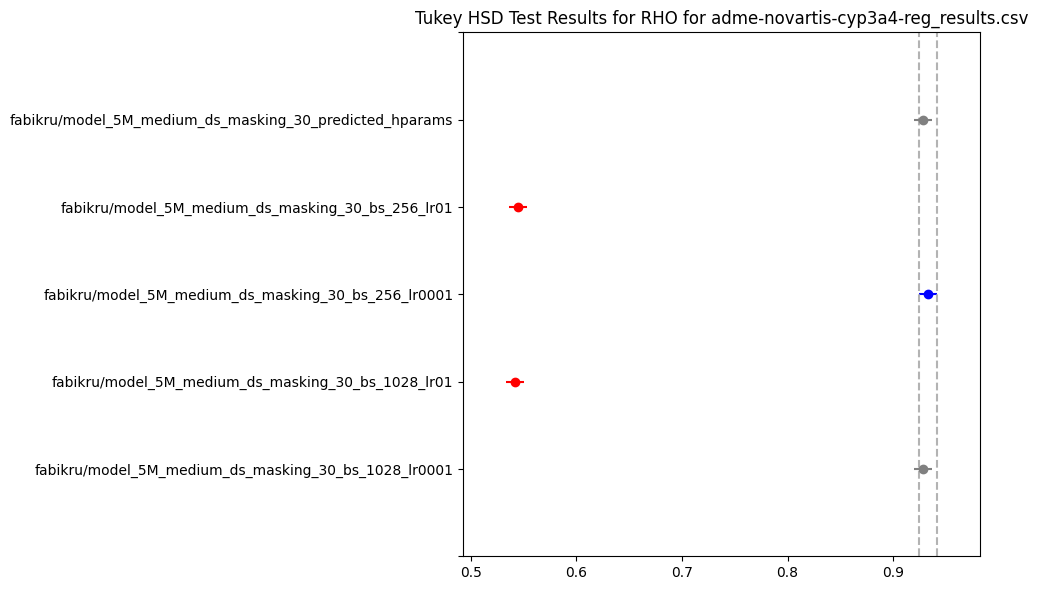

Significant differences found for mae (p = 0.0000)
Best performing model for mae: fabikru/model_5M_medium_ds_masking_30_bs_256_lr0001


<Figure size 1000x600 with 0 Axes>

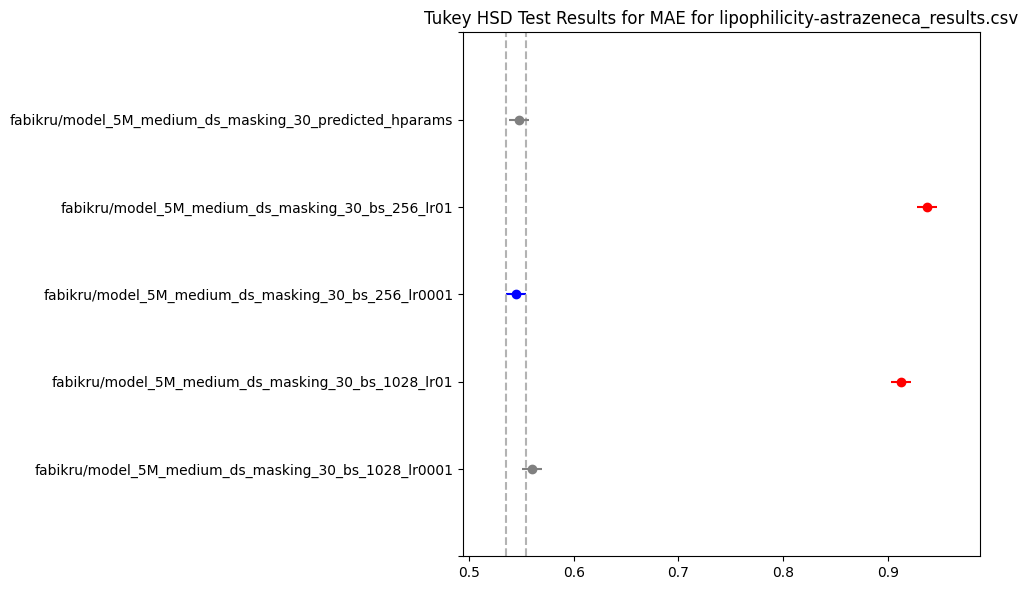

Significant differences found for mse (p = 0.0000)
Best performing model for mse: fabikru/model_5M_medium_ds_masking_30_bs_256_lr0001


<Figure size 1000x600 with 0 Axes>

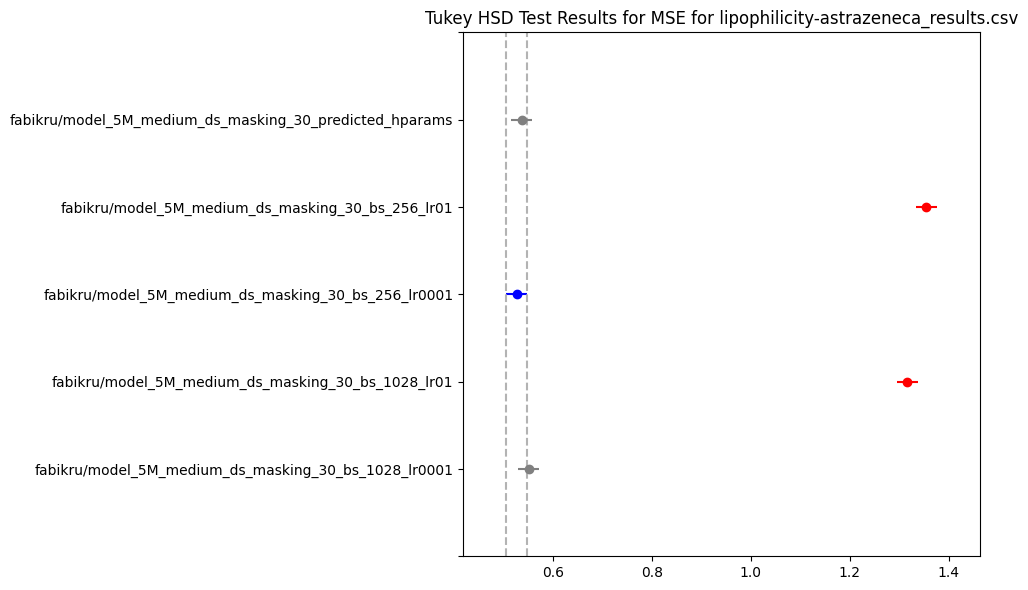

Significant differences found for r2 (p = 0.0000)
Best performing model for r2: fabikru/model_5M_medium_ds_masking_30_bs_256_lr0001


<Figure size 1000x600 with 0 Axes>

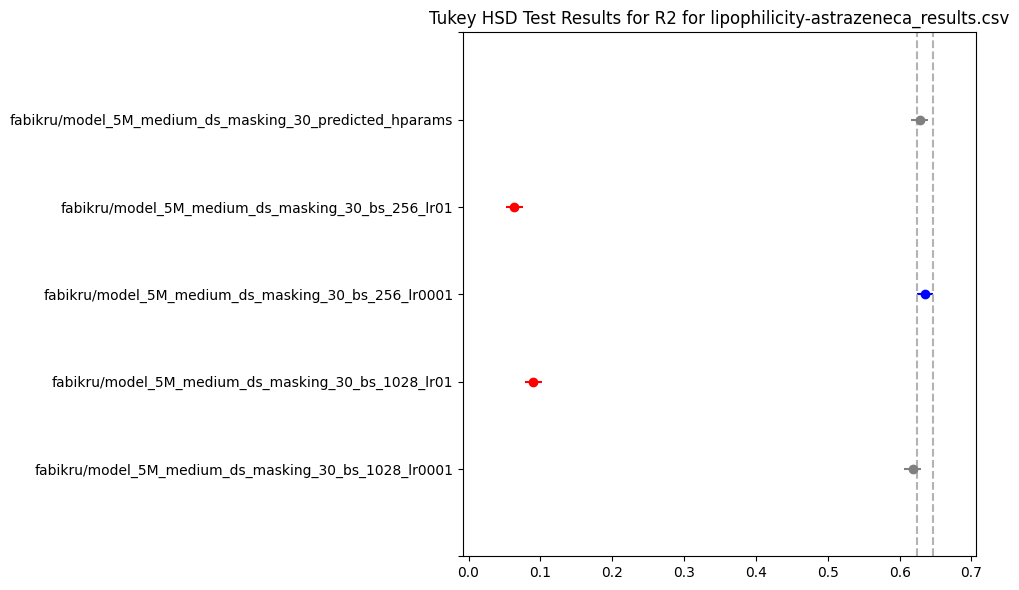

Significant differences found for rho (p = 0.0000)
Best performing model for rho: fabikru/model_5M_medium_ds_masking_30_bs_256_lr0001


<Figure size 1000x600 with 0 Axes>

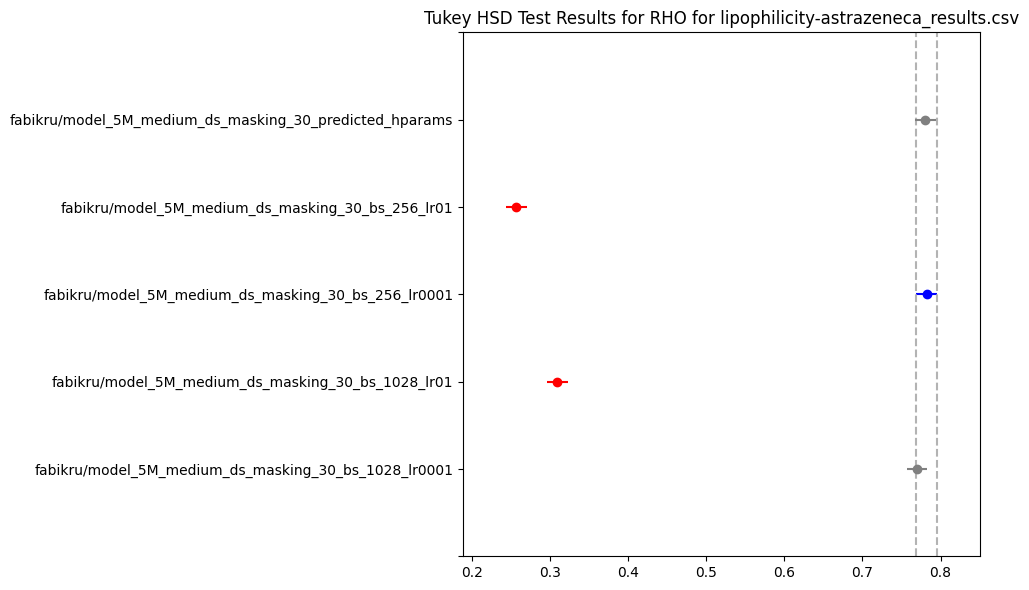

In [6]:
csv_paths = [
    "/home/ubuntu/smiles_encoder/experiments/hparam_insensitivity_experiment/adme-fang-HCLint-1_results.csv",
    "/home/ubuntu/smiles_encoder/experiments/hparam_insensitivity_experiment/adme-novartis-cyp3a4-reg_results.csv",
    "/home/ubuntu/smiles_encoder/experiments/hparam_insensitivity_experiment/lipophilicity-astrazeneca_results.csv",
]

for csv_path in csv_paths:
    # Load and prepare the data
    prepared_data = load_and_prepare_data(csv_path)

    for metric, metric_data in prepared_data.items():
        # Perform repeated measures ANOVA
        anova_results = repeated_measures_anova(metric_data)
        
        # Check if the ANOVA result is significant (p < 0.05)
        if anova_results['p_value'] < 0.05:
            print(f"Significant differences found for {metric} (p = {anova_results['p_value']:.4f})")
            
            # Find the best performing model
            best_model = find_best_model(metric_data, metric)
            print(f"Best performing model for {metric}: {best_model}")
            
            # Perform Tukey's HSD test
            tukey_results = tukey_hsd(metric_data)
            
            # Create and display the plot
            plt.figure(figsize=(10, 6))
            tukey_results['results'].plot_simultaneous(comparison_name=best_model)
            plt.title(f"Tukey HSD Test Results for {metric.upper()} for {csv_path.split('/')[-1]}")
            plt.tight_layout()
            plt.show()
        else:
            print(f"No significant differences found for {metric}")
